# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras import optimizers

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


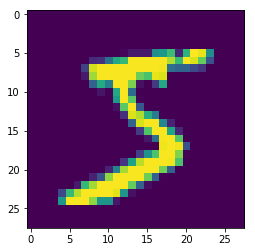

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Forth Model from last assignment**

In [0]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0901 08:08:54.258257 140451496798080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0901 08:08:54.280232 140451496798080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 08:08:54.283060 140451496798080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 08:08:54.308671 140451496798080 deprecation_wrapper.py:119] From /u

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay = 0.0001),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

W0901 08:08:55.671879 140451496798080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """
W0901 08:08:55.757230 140451496798080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 355us/step - loss: 0.2252 - acc: 0.9419 - val_loss: 0.0627 - val_acc: 0.9828
Epoch 2/30
60000/60000 [==============================] - 19s 312us/step - loss: 0.1035 - acc: 0.9707 - val_loss: 0.0384 - val_acc: 0.9883
Epoch 3/30
60000/60000 [==============================] - 19s 312us/step - loss: 0.0825 - acc: 0.9758 - val_loss: 0.0322 - val_acc: 0.9909
Epoch 4/30
60000/60000 [==============================] - 19s 313us/step - loss: 0.0709 - acc: 0.9790 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 5/30
60000/60000 [==============================] - 19s 315us/step - loss: 0.0635 - acc: 0.9807 - val_loss: 0.0258 - val_acc: 0.9927
Epoch 6/30
60000/60000 [==============================] - 19s 313us/step - loss: 0.0587 - acc: 0.9829 - val_loss: 0.0277 - val_acc: 0.9913
Epoch 7/30
60000/60000 [==============================] - 19s 311us/step - loss: 0.0531 - acc: 0.9848 - val_loss: 0.

With the modified model, highest accuracy achieved is approx **99.50%** on the validation dataset. 

New model after moving batch normalization before Relu activation function as suggested by different acadmecian as well as Dr. Andrew Ng.

In [0]:
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if sys.path[0] == '':


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay = 0.0001),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 324us/step - loss: 0.2263 - acc: 0.9417 - val_loss: 0.0887 - val_acc: 0.9780
Epoch 2/30
60000/60000 [==============================] - 18s 306us/step - loss: 0.1068 - acc: 0.9697 - val_loss: 0.0446 - val_acc: 0.9879
Epoch 3/30
60000/60000 [==============================] - 18s 306us/step - loss: 0.0852 - acc: 0.9757 - val_loss: 0.0387 - val_acc: 0.9882
Epoch 4/30
60000/60000 [==============================] - 18s 305us/step - loss: 0.0736 - acc: 0.9783 - val_loss: 0.0355 - val_acc: 0.9888
Epoch 5/30
60000/60000 [==============================] - 18s 305us/step - loss: 0.0640 - acc: 0.9813 - val_loss: 0.0264 - val_acc: 0.9917
Epoch 6/30
60000/60000 [==============================] - 18s 305us/step - loss: 0.0620 - acc: 0.9812 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 7/30
60000/60000 [==============================] - 18s 306us/step - loss: 0.0581 - acc: 0.9832 - val_loss: 0.

Model accuracy does not change much.

**New Model with Regularization**

Tried different regularization values and finally best results come with regularization value of 0.005. Though this has little negative impact on the accuracy and overall Learning.

In [0]:
from keras import regularizers

model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1), kernel_regularizer=regularizers.l2(0.005))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.005))) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.005))) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.005))) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.005)))
model.add(Convolution2D(10, 8, kernel_regularizer=regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay=0.0001),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 345us/step - loss: 0.4916 - acc: 0.9234 - val_loss: 0.3596 - val_acc: 0.9502
Epoch 2/30
60000/60000 [==============================] - 19s 323us/step - loss: 0.3728 - acc: 0.9385 - val_loss: 0.3383 - val_acc: 0.9460
Epoch 3/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.3280 - acc: 0.9467 - val_loss: 0.3284 - val_acc: 0.9444
Epoch 4/30
60000/60000 [==============================] - 19s 320us/step - loss: 0.2980 - acc: 0.9503 - val_loss: 0.3486 - val_acc: 0.9358
Epoch 5/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.2827 - acc: 0.9529 - val_loss: 0.2720 - val_acc: 0.9546
Epoch 6/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.2586 - acc: 0.9562 - val_loss: 0.2015 - val_acc: 0.9731
Epoch 7/30
60000/60000 [==============================] - 19s 320us/step - loss: 0.2494 - acc: 0.9577 - val_loss: 0.

**Implement Image Normalization**

In this model regularization has been removed because it was having negative impact.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)


In [0]:
from keras import regularizers

model = Sequential()

model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, (3, 3))) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, (3, 3))) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(16, (3, 3))) #Receptive field 14*14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Convolution2D(10, (1, 1)))
model.add(Convolution2D(10, (8, 8)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 16)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

training_set= train_gen.flow(X_train, y_train, batch_size=32)
test_set= train_gen.flow(X_test, y_test, batch_size=32)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay=0.0001),
             metrics=['accuracy'])
              
model.fit_generator(training_set, 
                         steps_per_epoch=60000//32, 
                         validation_data= test_set, 
                         validation_steps=10000//32, 
                         epochs=30)

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2634 - acc: 0.9291 - val_loss: 0.0816 - val_acc: 0.9781
Epoch 2/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1204 - acc: 0.9650 - val_loss: 0.0690 - val_acc: 0.9786
Epoch 3/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0973 - acc: 0.9713 - val_loss: 0.0489 - val_acc: 0.9854
Epoch 4/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0836 - acc: 0.9760 - val_loss: 0.0407 - val_acc: 0.9873
Epoch 5/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0745 - acc: 0.9782 - val_loss: 0.0383 - val_acc: 0.9888
Epoch 6/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0686 - acc: 0.9800 - val_loss: 0.0404 - val_acc: 0.9872
Epoch 7/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0634 - acc: 0.9817 - val_loss: 0.0353 - val_acc: 0.9891
Epoch 8/30
1875/1875 [==========================